Definition (距离)：在 Minkowski 距离中, 当 $q=1,2$ 或 $q \rightarrow+\infty$ 时, 分别得到
- 1)绝对值距离 (也叫Manhattan距离)
$$
q=1 \quad d_1(x, y)=\sum_{k=1}^p\left|x_k-y_k\right|
$$
- 2）欧式距离 (Normal Distance)
$$
q=2 \quad d_2(x, y)=\left[\sum_{k=1}^p\left|x_k-y_k\right|^2\right]^{\frac{1}{2}}
$$
- 3)Chebyshev距离
$$
q=+\infty \quad d_{\infty}(x, y)=\max _{1 \leq k \leq p}\left|x_k-y_k\right|
$$
以上三者中最常用的是欧氏距离(Normal Distance), 它的主要优点是当坐标 轴进行正交旋转时, 欧氏距离是保持不变的。

KNN算法的基本计算过程如下（在本节的讨论中, 使用欧氏距 离 (Normal Distance)衡量样本之间的相似度) :
(1) 计算已知类别数据集中的点与当前点之间的距离
(2) 按距离递增次序排序 (从近到远)
(3) 选取与当前点距离最小的 $k$ 个点
(4) 统计前 $k$ 个点所在的类别出现的频率
5 返回前 $k$ 个点出现频率最高的类别作为当前点的预测分类

In [1]:
import math
import numpy as np
movie_data = {'功夫熊猫': [39, 0, 31, '喜剧片'],
              '叶问3': [3, 2, 65, '动作片'],
              '伦敦陷落': [2, 3, 55, '动作片'],
              '代理情人': [9, 38, 2, '爱情片'],
              '新步步惊心': [8, 34, 17, '爱情片'],
              '谍影重重': [5, 2, 57, '动作片'],
              '美人鱼': [21, 17, 5, '喜剧片'],
              '宝贝当家': [45, 2, 9, '喜剧片']}
x = [23, 3, 17]# 测试样本
#求与数据集中所有数据的距离
KNN = []
for key, v in movie_data.items():
    d = math.sqrt((x[0] - v[0]) ** 2 + (x[1] - v[1]) ** 2 + (x[2] - v[2]) ** 2)
    KNN.append([key, round(d, 2)])
# 输出所用电影到唐人街探案的距离
print(KNN)
print("\n")

#按照距离大小进行递增排序
KNN.sort(key=lambda dis: dis[1])
#选取距离最小的样本；
KNN=KNN[:4]
print(KNN)
print("\n")

#确定距离最小的样本所在类别出现的频率，并输出出现频率最高的类别
labels = {'喜剧片': 0,
          '动作片': 0,
          '爱情片': 0}

for s in KNN:
    label = movie_data[s[0]]
    labels[label[3]] += 1
labels = sorted(labels.items(),key=lambda l: l[1],reverse=True)
labels = np.array(labels)
print(labels)
### find the most frequent label
most_freq_label = max(labels, key=lambda l: l[1])[0]
print(most_freq_label)

[['功夫熊猫', 21.47], ['叶问3', 52.01], ['伦敦陷落', 43.42], ['代理情人', 40.57], ['新步步惊心', 34.44], ['谍影重重', 43.87], ['美人鱼', 18.55], ['宝贝当家', 23.43]]


[['美人鱼', 18.55], ['功夫熊猫', 21.47], ['宝贝当家', 23.43], ['新步步惊心', 34.44]]


[['喜剧片' '3']
 ['爱情片' '1']
 ['动作片' '0']]
喜剧片


- K-means 算法
- 

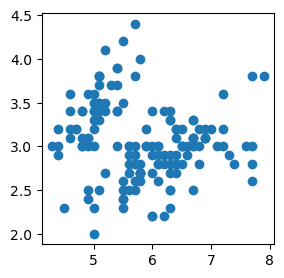

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt 
lris_df = datasets.load_iris()
### show the lris_df
x_axis = lris_df.data[:,0]
y_axis = lris_df.data[:,1]
#ÿ6cπ ̨
plt.figure(figsize=(3, 3))
plt.scatter(x_axis, y_axis)

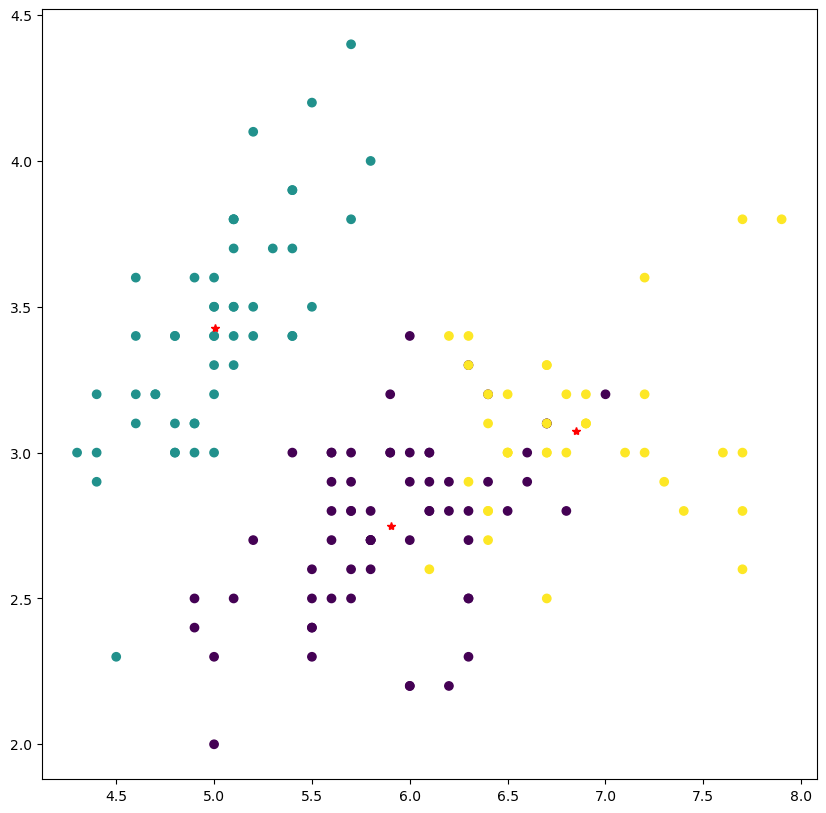

In [3]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(lris_df.data)
plt.figure(figsize=(10, 10))
plt.scatter(x_axis, y_axis, c=model.labels_)
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],'r*')
plt.show()

### 层次聚类法

怎样才能生成这样的聚类图呢? 步骤如下:
(1) 计算 $n$ 个样本点两两之间的距离 $\left\{d_{i j}\right\}$, 记为矩阵 $D=\left(d_{i j}\right)_{n \times n}$
(2) 首先构造 $n$ 个类, 每一个类中只包含一个样本点, 每一类的平台 高度均为零；
炇 3 (3) 合并距离最近的两类为新类, 并且以这两类间的距离值作为聚类 图中的平台高度 ;
(4) 计算新类与当前各类的距离, 若类的个数已经等于 1 , 转入步 骤5, 否则, 回到步骤 3 ;
(5) 画聚类图;
6 决定类的个数和类。

(0.75, 6.25, -0.15000000000000002, 3.15)

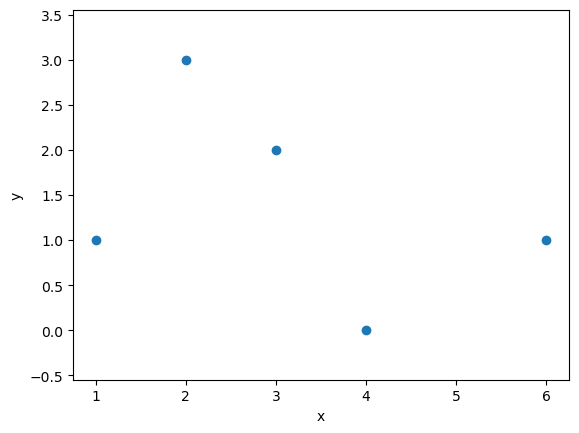

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
data = np.array([[1,1],
               [2,3],
               [3,2],
               [4,0],
               [6,1]])
plt.scatter(data[:,0], data[:,1]) 
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

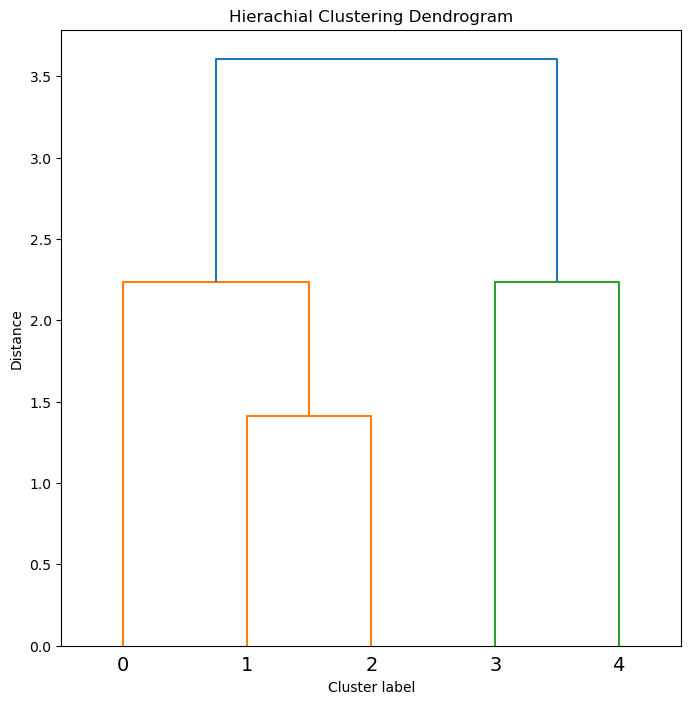

In [5]:
### linkage is used to calculate the distance between clusters
z = linkage(data, "average") 
### fig is used to draw a figure, ax is used to draw a subplot
fig, ax = plt.subplots(figsize=(8,8))
### Question: What is dendrogram?
### Answer: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
dendrogram(z, leaf_font_size=14)
plt.title("Hierachial Clustering Dendrogram")
plt.xlabel("Cluster label")
plt.ylabel("Distance")
### plt.axhline is used to draw a horizontal line
plt.axhline(y=10) 
plt.show()

$u(x, y, t)$

In [6]:
def binarySearch():
    ## 1.确定搜索范围
    range = [0, 100]
    ## 2.确定搜索次数
    